# Sprint ディープラーニングフレームワーク１

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#このSprintについて" data-toc-modified-id="このSprintについて-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>このSprintについて</a></span><ul class="toc-item"><li><span><a href="#Sprintの目的" data-toc-modified-id="Sprintの目的-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sprintの目的</a></span></li><li><span><a href="#どのように学ぶか" data-toc-modified-id="どのように学ぶか-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>どのように学ぶか</a></span></li></ul></li><li><span><a href="#コードリーディング" data-toc-modified-id="コードリーディング-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>コードリーディング</a></span><ul class="toc-item"><li><span><a href="#【問題1】スクラッチを振り返る" data-toc-modified-id="【問題1】スクラッチを振り返る-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>【問題1】スクラッチを振り返る</a></span></li><li><span><a href="#データセットの用意" data-toc-modified-id="データセットの用意-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>データセットの用意</a></span></li><li><span><a href="#【問題2】スクラッチとTensorFlowの対応を考える" data-toc-modified-id="【問題2】スクラッチとTensorFlowの対応を考える-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>【問題2】スクラッチとTensorFlowの対応を考える</a></span></li></ul></li><li><span><a href="#他のデータセットへの適用" data-toc-modified-id="他のデータセットへの適用-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>他のデータセットへの適用</a></span><ul class="toc-item"><li><span><a href="#【問題3】3種類全ての目的変数を使用したIrisのモデルを作成" data-toc-modified-id="【問題3】3種類全ての目的変数を使用したIrisのモデルを作成-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>【問題3】3種類全ての目的変数を使用したIrisのモデルを作成</a></span></li><li><span><a href="#【問題4】House-Pricesのモデルを作成" data-toc-modified-id="【問題4】House-Pricesのモデルを作成-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>【問題4】House Pricesのモデルを作成</a></span></li><li><span><a href="#【問題5】MNISTのモデルを作成" data-toc-modified-id="【問題5】MNISTのモデルを作成-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>【問題5】MNISTのモデルを作成</a></span></li></ul></li></ul></div>

## このSprintについて
### Sprintの目的
* フレームワークのコードを読めるようにする
* フレームワークを習得し続けられるようになる
* 理論を知っている範囲をフレームワークで動かす

### どのように学ぶか
TensorFLowのサンプルコードを元に、これまで扱ってきたデータセットを学習していきます。

## コードリーディング
TensorFLowによって2値分類を行うサンプルコードを載せました。今回はこれをベースにして進めます。

tf.kerasやtf.estimatorなどの高レベルAPIは使用していません。低レベルなところから見ていくことにします。

### 【問題1】スクラッチを振り返る
ここまでのスクラッチを振り返り、ディープラーニングを実装するためにはどのようなものが必要だったかを列挙してください。

* 重み、バイアスの初期化があった
* エポックのループが必要だった
* 層ごとにノード数、活性化関数を決めた
* 訓練データをミニバッチサイズにした
* 線形結合した
* 活性化関数に線形結合した値を代入し、その結果を次の層へ渡した（順伝播）
* 損失関数を計算した
* 重み、バイアスの更新をした（誤差逆伝播法）
* 検証データに対して、学習したパラメーターを使って予測した

### データセットの用意
以前から使用しているIrisデータセットを使用します。  
以下のサンプルコードではIris.csvが同じ階層にある想定です。  
https://www.kaggle.com/uciml/iris/data

目的変数はSpeciesですが、3種類ある中から以下の2種類のみを取り出して使用します。

* Iris-versicolor
* Iris-virginica

### 【問題2】スクラッチとTensorFlowの対応を考える
以下のサンプルコードを見て、先ほど列挙した「ディープラーニングを実装するために必要なもの」がTensorFlowではどう実装されているかを確認してください。

それを簡単に言葉でまとめてください。単純な一対一の対応であるとは限りません。

《サンプルコード》  
＊バージョン1.5から1.14の間で動作を確認済みです。

In [15]:
# Tensorflow1系としてインポート（2系を無効化）
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [16]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [17]:
def example_net(x):
    """
    単純な3層ニューラルネットワーク
    """
    # 重みとバイアスの宣言
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # tf.addと+は等価である
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] 
    
    return layer_output

In [18]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# データセットの読み込み
dataset_path ="./Iris/Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
    
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# ネットワーク構造の読み込み                               
logits = example_net(X)

# 目的関数
loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))

# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 推定結果
correct_pred = tf.equal(tf.sign(Y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))

# 指標値計算
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()

# 計算グラフの実行
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        # エポックごとにループ
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_acc = 0
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # ミニバッチごとにループ
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            total_acc += acc
        total_loss /= n_samples
        total_acc /= n_samples
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}".format(epoch, loss, val_loss, acc, val_acc))
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

Epoch 0, loss : 59.1013, val_loss : 24.7984, acc : 0.250, val_acc : 0.625
Epoch 1, loss : 2.8872, val_loss : 7.7538, acc : 0.750, val_acc : 0.375
Epoch 2, loss : 0.0000, val_loss : 0.3654, acc : 1.000, val_acc : 0.875
Epoch 3, loss : 3.5506, val_loss : 5.0460, acc : 0.500, val_acc : 0.688
Epoch 4, loss : 0.0031, val_loss : 2.6580, acc : 1.000, val_acc : 0.750
Epoch 5, loss : 0.0000, val_loss : 1.5277, acc : 1.000, val_acc : 0.875
Epoch 6, loss : 0.0000, val_loss : 0.3933, acc : 1.000, val_acc : 0.938
Epoch 7, loss : 0.0006, val_loss : 5.0982, acc : 1.000, val_acc : 0.750
Epoch 8, loss : 0.0021, val_loss : 4.2220, acc : 1.000, val_acc : 0.625
Epoch 9, loss : 0.0000, val_loss : 2.9164, acc : 1.000, val_acc : 0.812
test_acc : 0.850


* 重み、バイアスの初期化があった  
  -->127.  
     init = tf.global_variables_initializer()　でパラメータの初期化


* エポックのループが必要だった  
  -->132.  
    for epoch in range(num_epochs):　でepoch数分ループしている
  
  
* 層ごとにノード数、活性化関数を決めた  
  -->68-76.  
  ノード数などパラメータを設定している  
  -->90-107.  
  layer_1 = tf.nn.relu(layer_1)　で活性化関数を定義している

  
* 訓練データをミニバッチサイズにした  
  -->29.  
  GetMiniBatch クラスを定義、138.ミニバッチごとに計算
  

* 線形結合した  
  -->102,104.  
  layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
  
  
* 活性化関数に線形結合した値を代入し、その結果を次の層へ渡した（順伝播）  
  -->104,107.  
  layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
  
  
* 損失関数を計算した  
  -->115,141.  
  loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=logits))
  
  
* 重み、バイアスの更新をした（誤差逆伝播法）  
  -->118,119.  
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)  
  train_op = optimizer.minimize(loss_op)  
   
   
* 検証データに対して、学習したパラメーターを使って予測した  
  -->122,148.  
  test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})

## 他のデータセットへの適用
これまで扱ってきた小さなデータセットがいくつかあります。
上記サンプルコードを書き換え、これらに対して学習・推定を行うニューラルネットワークを作成してください。
* Iris（3種類全ての目的変数を使用）
* House Prices
どのデータセットもtrain, val, testの3種類に分けて使用してください。

### 【問題3】3種類全ての目的変数を使用したIrisのモデルを作成
Irisデータセットのtrain.csvの中で、目的変数Speciesに含まれる3種類全てを分類できるモデルを作成してください。

* Iris Species

2クラスの分類と3クラス以上の分類の違いを考慮してください。それがTensorFlowでどのように書き換えられるかを公式ドキュメントなどを参考に調べてください。

《ヒント》

以下の2箇所は2クラス分類特有の処理です。

メソッドは以下のように公式ドキュメントを確認してください。
* https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits
* https://www.tensorflow.org/api_docs/python/tf/math/sign

In [19]:
"""
問題３：TensorFlowで実装したニューラルネットワークを使いIrisデータセットを多値分類する
"""
# データセットの読み込み
dataset_path ="./Iris/Iris.csv"
df_iris = pd.read_csv(dataset_path)

# データフレームから条件抽出
df_iris = df_iris[(df_iris["Species"] == "Iris-setosa")
                  |(df_iris["Species"] == "Iris-versicolor")
                  |(df_iris["Species"] == "Iris-virginica")
                 ]
y = df_iris["Species"]
X = df_iris.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2

# 正解ラベル値をone-hotエンコーディング
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = enc.fit_transform(y[:, np.newaxis])

# trainとtestに分割
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [20]:
print('y.shape:',y.shape)
print('X.shape:',X.shape)

y.shape: (150, 3)
X.shape: (150, 4)


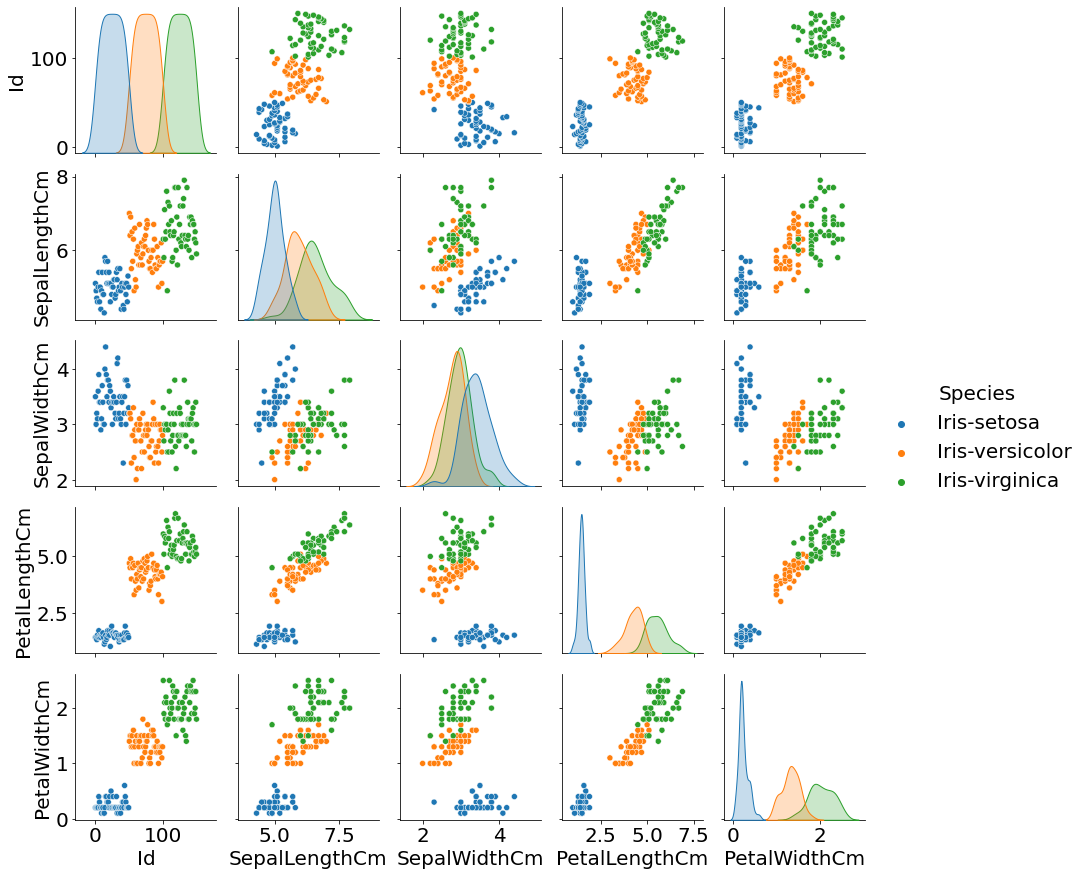

In [21]:
# Trainデータをプロット
import seaborn as sns
sns.pairplot(df_iris,hue='Species');

In [22]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# ネットワーク構造の読み込み                               
logits = example_net(X)

# 目的関数
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                         labels=Y, logits=logits)
                        )

# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 推定結果
correct_pred = tf.equal(tf.argmax(Y,1), tf.argmax(tf.nn.softmax(logits),1))

# 指標値計算
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()

# 計算グラフの実行
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        # エポックごとにループ
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_acc = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            
            # ミニバッチごとにループ
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run(
                [loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y}
            )
            total_loss += loss
            total_acc += acc
            
        total_loss /= n_samples
        total_acc /= n_samples
        
        val_loss, val_acc = sess.run(
            [loss_op, accuracy], feed_dict={X: X_val, Y: y_val}
        )
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}"
              .format(epoch, loss, val_loss, acc, val_acc))
        
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

Epoch 0, loss : 8.3996, val_loss : 23.3471, acc : 0.833, val_acc : 0.417
Epoch 1, loss : 1.8161, val_loss : 5.5058, acc : 0.667, val_acc : 0.750
Epoch 2, loss : 0.0000, val_loss : 2.4080, acc : 1.000, val_acc : 0.750
Epoch 3, loss : 0.0000, val_loss : 1.8253, acc : 1.000, val_acc : 0.875
Epoch 4, loss : 0.0016, val_loss : 4.1302, acc : 1.000, val_acc : 0.792
Epoch 5, loss : 0.0000, val_loss : 1.3194, acc : 1.000, val_acc : 0.833
Epoch 6, loss : 0.0000, val_loss : 1.8961, acc : 1.000, val_acc : 0.833
Epoch 7, loss : 0.0000, val_loss : 0.7497, acc : 1.000, val_acc : 0.917
Epoch 8, loss : 0.0000, val_loss : 3.2323, acc : 1.000, val_acc : 0.833
Epoch 9, loss : 0.0000, val_loss : 2.3119, acc : 1.000, val_acc : 0.833
test_acc : 0.967


### 【問題4】House Pricesのモデルを作成
回帰問題のデータセットであるHouse Pricesを使用したモデルを作成してください。
  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
  
この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使ってください。説明変数はさらに増やしても構いません。

分類問題と回帰問題の違いを考慮してください。

In [23]:
"""
問題４：TensorFlowで実装したニューラルネットワークを使いHouse Priceデータを予測する
"""
# データセットの読み込み
dataset_path ="./house_prices_advanced_regression_techniques/train.csv"
df_house = pd.read_csv(dataset_path)

# データフレームから条件抽出
y = df_house[['SalePrice']]
X = df_house[['GrLivArea','YearBuilt']]
y = np.array(np.log1p(y))
X = np.array(np.log1p(X))

# trainとtestに分割
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [24]:
print('y.shape:',y.shape)
print('X.shape:',X.shape)

y.shape: (1460, 1)
X.shape: (1460, 2)


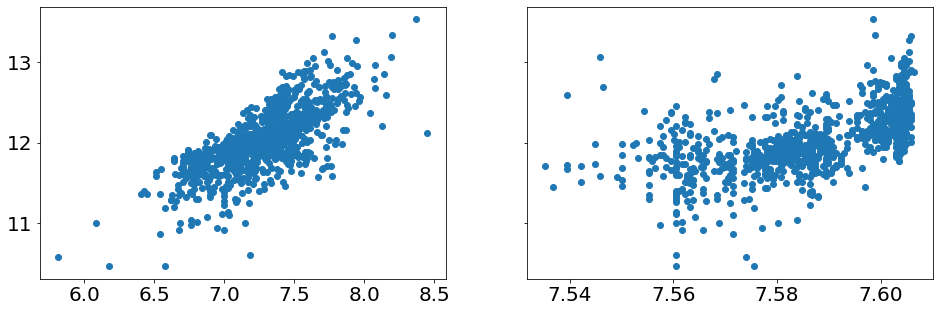

In [25]:
# Trainデータをプロット
plt.rcParams["font.size"] = 20
fig,ax = plt.subplots(1,2,sharey=True,figsize=(16, 5))

ax[0].scatter(X_train[:,0],y_train)
ax[1].scatter(X_train[:,1],y_train);

In [26]:
def regression_net(x):
    """
    単純な3層ニューラルネットワーク
    """
    # 重みとバイアスの宣言
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # tf.addと+は等価である
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] 
    
    return layer_output

In [27]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# 計算グラフに渡す引数の形を決める
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# ネットワーク構造の読み込み                               
logits = regression_net(X)

# 目的関数
loss_op = tf.reduce_mean(tf.square(logits - Y))

# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 指標値計算
mean_square_error = tf.reduce_mean(tf.square(logits - Y))

# variableの初期化
init = tf.global_variables_initializer()

# 計算グラフの実行
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        # エポックごとにループ
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_mse = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            
            # ミニバッチごとにループ
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            
            loss, mse = sess.run([loss_op, mean_square_error],
                                 feed_dict={X: mini_batch_x, Y: mini_batch_y}
            )
            total_loss += loss
            total_mse += mse
            
        total_loss /= n_samples
        total_mse /= n_samples
        
        val_loss, val_mse = sess.run([loss_op, mean_square_error],
                                     feed_dict={X: X_val, Y: y_val}
        )
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, mse : {:.3f}, val_mse : {:.3f}"
              .format(epoch, loss, val_loss, mse, val_mse))
    test_mse = sess.run(mean_square_error, feed_dict={X: X_test, Y: y_test})
    print("test_mse : {:.3f}".format(test_mse))

Epoch 0, loss : 21.7338, val_loss : 23.3330, mse : 21.734, val_mse : 23.333
Epoch 1, loss : 8.0122, val_loss : 10.3063, mse : 8.012, val_mse : 10.306
Epoch 2, loss : 3.3173, val_loss : 3.2211, mse : 3.317, val_mse : 3.221
Epoch 3, loss : 0.6217, val_loss : 0.5803, mse : 0.622, val_mse : 0.580
Epoch 4, loss : 0.1681, val_loss : 0.2013, mse : 0.168, val_mse : 0.201
Epoch 5, loss : 0.1739, val_loss : 0.2550, mse : 0.174, val_mse : 0.255
Epoch 6, loss : 0.1331, val_loss : 0.2182, mse : 0.133, val_mse : 0.218
Epoch 7, loss : 0.1017, val_loss : 0.1857, mse : 0.102, val_mse : 0.186
Epoch 8, loss : 0.0407, val_loss : 0.1048, mse : 0.041, val_mse : 0.105
Epoch 9, loss : 0.0320, val_loss : 0.0929, mse : 0.032, val_mse : 0.093
test_mse : 0.090


### 【問題5】MNISTのモデルを作成
ニューラルネットワークのスクラッチで使用したMNISTを分類するモデルを作成してください。

3クラス以上の分類という点ではひとつ前のIrisと同様です。入力が画像であるという点で異なります。

スクラッチで実装したモデルの再現を目指してください。

In [28]:
"""
問題５：TensorFlowで実装したニューラルネットワークを使いMNISTデータを分類する
"""
# MNISTデータセットのダウンロード
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

In [29]:
# データの確認
print(X.shape) # (60000, 28, 28)
print(X.shape) # (10000, 28, 28)
print(X[0].dtype) # uint8

(60000, 28, 28)
(60000, 28, 28)
uint8


In [30]:
# 平滑化
X = X.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [31]:
# 型変換、正規化
X = X.astype(np.float)
X_test = X_test.astype(np.float)
X /= 255
X_test /= 255
print(X.max()) # 1.0
print(X.min()) # 0.0

1.0
0.0


In [32]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_one_hot = enc.fit_transform(y[:, np.newaxis])
y_test = enc.transform(y_test[:, np.newaxis])
print(y.shape) # (60000,)
print(y_one_hot.shape) # (60000, 10)
print(y_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [34]:
def lenet(x):
    """
    CNN
    """
    # 重みとバイアスの宣言
    weights = {
        'w1': tf.Variable(tf.random_normal([5,5,1,6])),
        'w2': tf.Variable(tf.random_normal([5,5,6,16])),
        'w3': tf.Variable(tf.random_normal([7*7*16, 120])),
        'w4': tf.Variable(tf.random_normal([120, 84])),
        'w5': tf.Variable(tf.random_normal([84, n_classes]))
    }
    
    biases = {
        'b1': tf.Variable(tf.random_normal([6])),
        'b2': tf.Variable(tf.random_normal([16])),
        'b3': tf.Variable(tf.random_normal([120])),
        'b4': tf.Variable(tf.random_normal([84])),
        'b5': tf.Variable(tf.random_normal([n_classes]))
    }
    
    x = tf.reshape(x, [-1, 28, 28, 1])
    conve_1 = tf.add(tf.nn.conv2d(x, weights['w1'],strides=[1,1,1,1],
                                  padding='SAME'),
                     biases['b1'])
    
    conve_1 = tf.nn.relu(conve_1)
    
    pooli_1 = tf.nn.pool(conve_1, window_shape=[2,2],strides=[2,2],
                         pooling_type='MAX', padding='VALID')
    
    conve_2 = tf.add(tf.nn.conv2d(pooli_1, weights['w2'],strides=[1,1,1,1],
                                  padding='SAME'),
                     biases['b2'])
    
    conve_2 = tf.nn.relu(conve_2)
    
    pooli_2 = tf.nn.pool(conve_2, window_shape=[2,2],strides=[2,2],
                         pooling_type='MAX', padding='VALID')
    
    x_reshape = tf.reshape(pooli_2, [-1,7*7*16])
    layer_1 = tf.add(tf.matmul(x_reshape, weights['w3']), biases['b3'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w4']), biases['b4'])
    layer_2 = tf.nn.relu(layer_2)
    # tf.addと+は等価である
    layer_output = tf.matmul(layer_2, weights['w5']) + biases['b5'] 
    
    return layer_output

In [35]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 200
num_epochs = 30

n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

# ネットワーク構造の読み込み                               
logits = lenet(X)

# 目的関数
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                         labels=Y, logits=logits)
                        )

# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 推定結果
correct_pred = tf.equal(tf.argmax(Y,1), tf.argmax(tf.nn.softmax(logits),1))

# 指標値計算
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()

# 計算グラフの実行
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        # エポックごとにループ
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_acc = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            
            # ミニバッチごとにループ
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run(
                [loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            total_acc += acc
            
        total_loss /= n_samples
        total_acc /= n_samples
    
        val_loss, val_acc = sess.run(
            [loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}"
             .format(epoch, loss, val_loss, acc, val_acc))
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

Epoch 0, loss : 66.4558, val_loss : 133.1357, acc : 0.915, val_acc : 0.881
Epoch 1, loss : 34.5375, val_loss : 65.4521, acc : 0.945, val_acc : 0.917
Epoch 2, loss : 18.6272, val_loss : 44.2037, acc : 0.980, val_acc : 0.930
Epoch 3, loss : 14.3536, val_loss : 34.9310, acc : 0.985, val_acc : 0.937
Epoch 4, loss : 7.1539, val_loss : 30.7477, acc : 0.980, val_acc : 0.943
Epoch 5, loss : 4.7894, val_loss : 29.7833, acc : 0.975, val_acc : 0.945
Epoch 6, loss : 0.6155, val_loss : 27.4647, acc : 0.995, val_acc : 0.945
Epoch 7, loss : 0.9376, val_loss : 23.7753, acc : 0.990, val_acc : 0.952
Epoch 8, loss : 0.0000, val_loss : 23.2387, acc : 1.000, val_acc : 0.950
Epoch 9, loss : 0.6033, val_loss : 22.9821, acc : 0.990, val_acc : 0.954
Epoch 10, loss : 0.2864, val_loss : 22.5009, acc : 0.985, val_acc : 0.952
Epoch 11, loss : 2.3895, val_loss : 22.8011, acc : 0.975, val_acc : 0.952
Epoch 12, loss : 0.0000, val_loss : 20.7073, acc : 1.000, val_acc : 0.956
Epoch 13, loss : 0.0390, val_loss : 22.8512